# Most Streamed Spotify Songs of 2023
Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("spotify-2023.csv", encoding = 'latin-1')
df['track_name'].astype(str)
#df.head(10)
#print(df.shape)
#print(df.info)

## Music Analysis

#### What is the most streamed song in 2023?

In [94]:
# When searching for the song with the most streams, we can see that there are data quality issues
print(df['streams'].max())

# Convert 'streams' to float data type and replace non-numeric values with NaN
df['converted_streams'] = pd.to_numeric(df['streams'], errors='coerce')

BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [95]:
topSong = df.loc[df['converted_streams'] == df['converted_streams'].max(), ['track_name', 'artist(s)_name']]

print("The top song of 2023 was " + topSong['track_name'] + " by " + topSong['artist(s)_name'] + '.')

55    The top song of 2023 was Blinding Lights by Th...
dtype: object


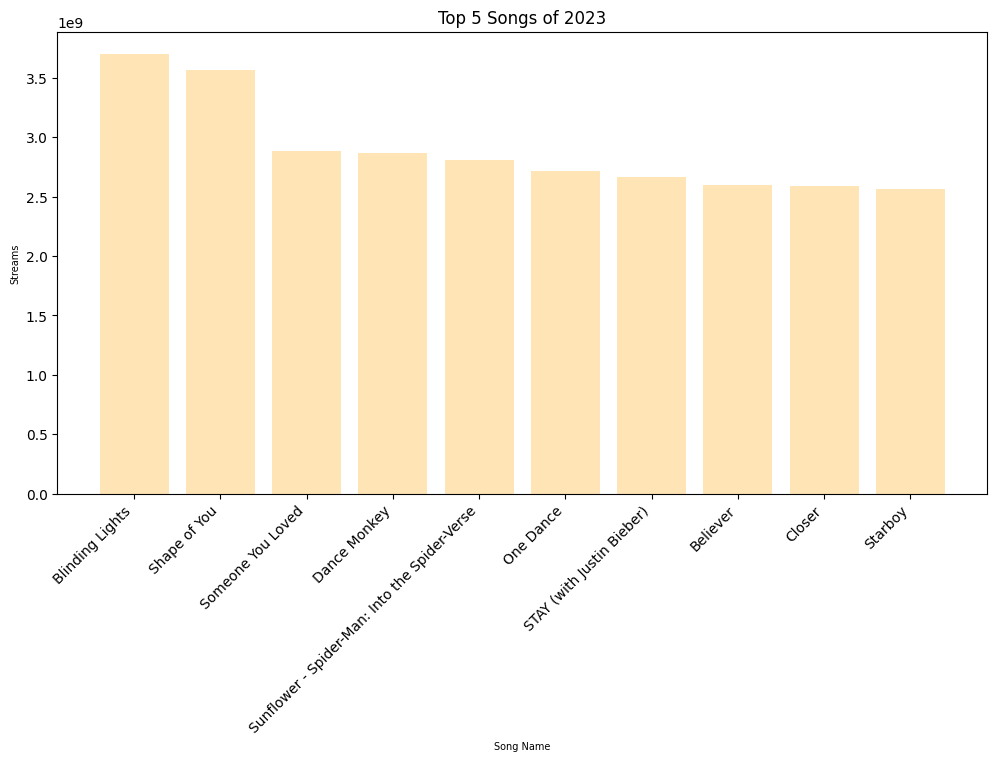

In [97]:
# Keep top 5 artists for visualization
topSong_df = df.sort_values('converted_streams', ascending=False).head(10)

# Visualize the top 5 artists
plt.figure(figsize=(12,6))
plt.bar(topSong_df.track_name, topSong_df.converted_streams, color='moccasin')
plt.title("Top 5 Songs of 2023", fontsize = 12)
plt.xlabel("Song Name", fontsize = 7)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Streams", fontsize = 7)
plt.show()

#### Who is the most streamed artist in 2023?
Since multiple artists can be aligned to a track, we'll give all artists per track the total number of streams per track.
For example, Latto's and Jung Kook's song 'Seven' has 141,381,703 streams -- both artists will recieve 141,381,703 streams to their total count of streams.

In [98]:
# Create a new dataframe with only artists and streams
artist_df = df[['artist(s)_name', 'converted_streams']].copy()

listArtistConversion = []

# Convert artist(s)_name to a list of artists
for item in artist_df['artist(s)_name']:
    listArtistConversion.append(item.split(","))

# Add the column to our new dataframe
artist_df['artist'] = listArtistConversion

# Give each artist on a track, the number of streams for that track
artist_df = artist_df.explode('artist')

# Sum total streams per artist
artist_df_2 = artist_df.groupby('artist')['converted_streams'].sum().reset_index(name='totalStreams')

# Return the artists with the most streams
topArtist = artist_df_2.loc[artist_df_2['totalStreams'] == artist_df_2['totalStreams'].max(), ['artist', 'totalStreams']]

print("The most streamed artists of 2023 was " + topArtist['artist'] + ' with ' + str(topArtist['totalStreams']) + ' streams.')

751    The most streamed artists of 2023 was The Week...
Name: artist, dtype: object


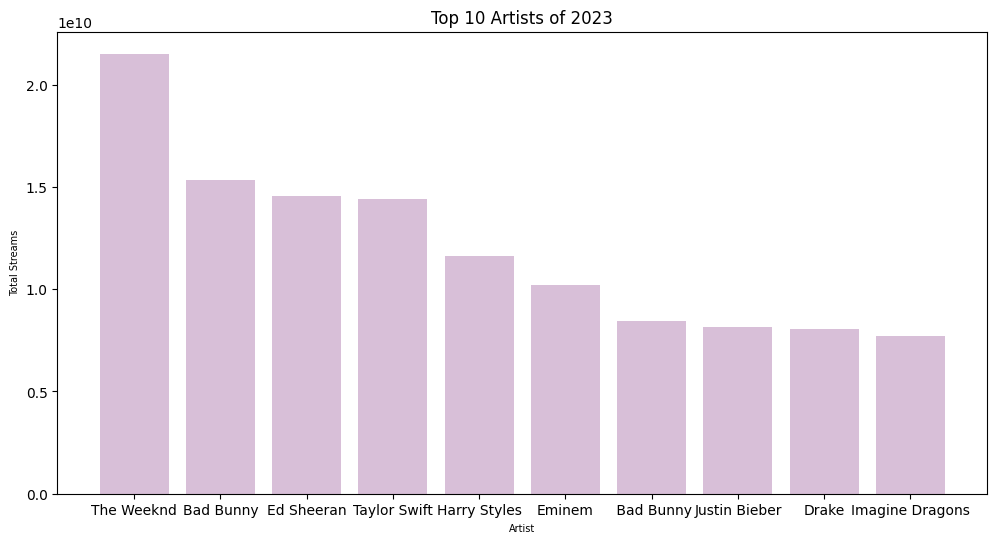

In [99]:
# Keep top 10 artists for visualization
artist_df_2 = artist_df_2.sort_values('totalStreams', ascending=False).head(10)

# Visualize the top 10 artists
plt.figure(figsize=(12,6))
plt.bar(artist_df_2.artist, artist_df_2.totalStreams, color='thistle')
plt.title("Top 10 Artists of 2023", fontsize = 12)
plt.xlabel("Artist", fontsize = 7)
plt.ylabel("Total Streams", fontsize = 7)
plt.show()